# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name: Snowy Plovers
Created by Bhavya Vatsavayi, Sherine Aldrin, Zara Rahim (017151069)
(SJSU IDs )  
Last updated: 10-9-2025  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/SNPL_merged_dataset.csv')

Mounted at /content/drive


### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

Our dataset is not completely clean because there are columns with missing values or redundant entries. For example, in the columns Nest_ID, band information, behavior columns, and predator notes, there are missing entries, although some are intentional. Additionally, there are some data type inconsistencies with numeric fields, such as in TSN where they are stored as floats instead of integers. In order to clean this we will: handle the missing by distinguishing intentional empty entries and filling with zeros, remove redundant columns to make the dataset concise, convert data types, and checking if the coordinates fall within the Point Reye’s National Seashore.

### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

How do different types of predators vary across the different beaches at Point Reyes?

Text(0.5, 1.0, 'Predator Distribution Across Beach Locations')

<Figure size 1000x600 with 0 Axes>

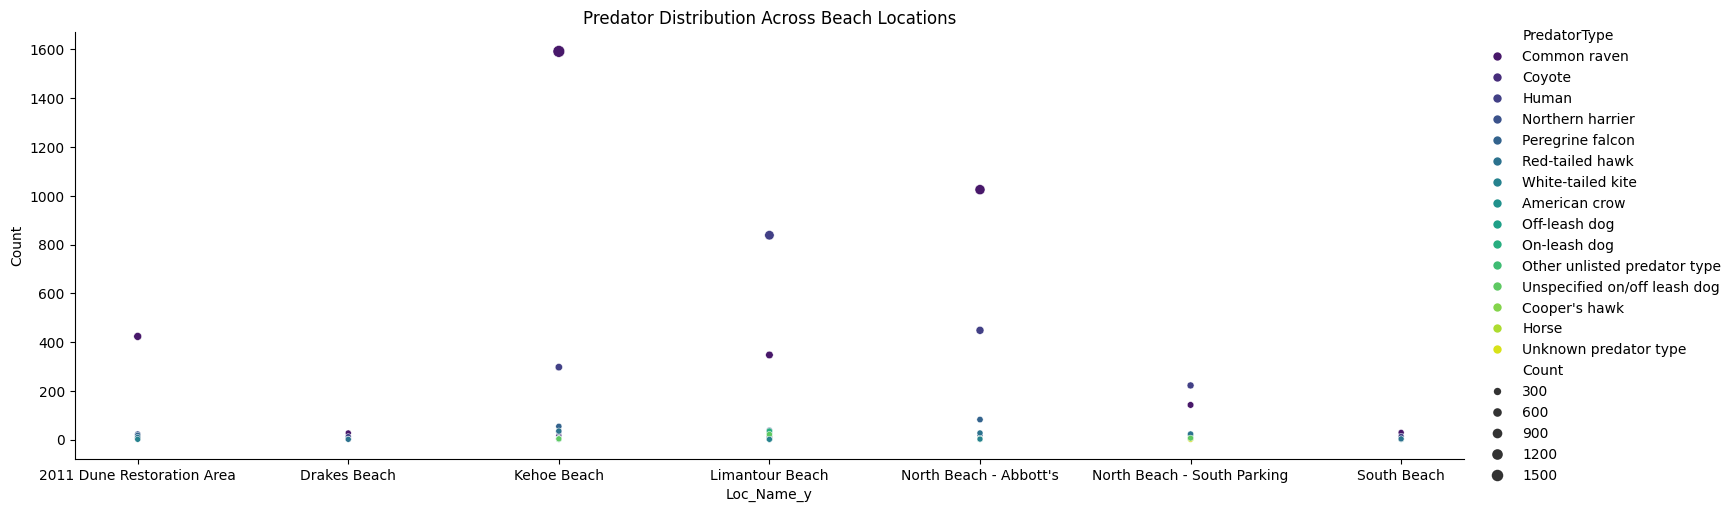

In [ ]:
# Your code here . . .

#using locations with the most predator observations

locations = merged_df['Loc_Name_y'].value_counts().head(10).index
predator_df = merged_df[merged_df['Loc_Name_y'].isin(locations)]

predatorCount = predator_df.groupby(['Loc_Name_y', 'PredatorType']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
g = sns.relplot(
    data = predatorCount,
    x = 'Loc_Name_y',
    y = 'Count',
    hue = 'PredatorType',
    size = 'Count',
    palette = "viridis",
    aspect = 3
)
plt.title("Predator Distribution Across Beach Locations")


### Q3: Come up with a another unique question. This question must use map() or apply()

Question:
What are the most common predator actions observed at different locations?

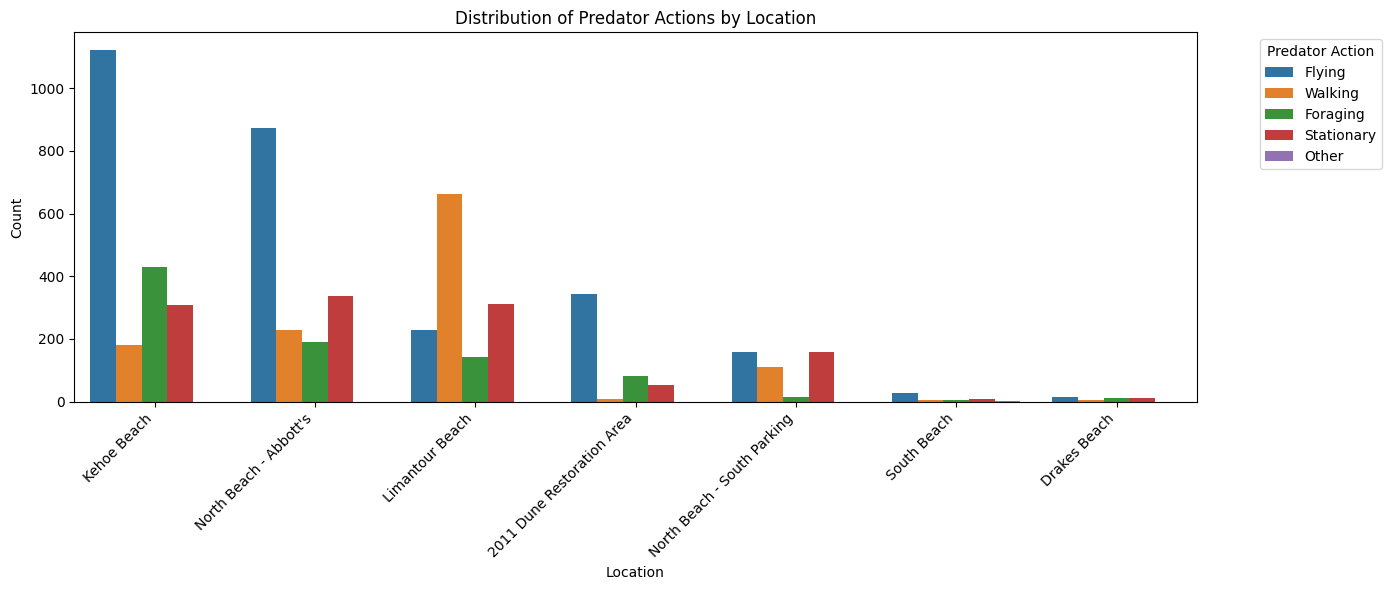

In [ ]:
# Your code here . . .

df = merged_df

# make the PredatorAction string consistently capitalized
df['PredatorAction'] = df['PredatorAction'].map(lambda x: x.strip().capitalize() if pd.notnull(x) else x)

# make the plot
plt.figure(figsize=(14,6))
# x axis is the location name, the point is characterized by acrion, and ordered by the location value
sns.countplot(data=df, x='Loc_Name_y', hue='PredatorAction', order=df['Loc_Name_y'].value_counts().index)
#rotate plot
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Predator Actions by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Predator Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [ ]:
# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
# Your code here . . .
# Question: How does the snowy plover hatchling count compare to the predator count depending on the beach location?

# We're doing a stack plot.

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Run configure_plotly_browser_state() if you are in Google colab
configure_plotly_browser_state()

# Stack plots
x = merged_df.Loc_Name_y

trace1 = {
  'x': x,
  'y': merged_df.NumPredator,
  'name': 'NumPredator',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': merged_df.SNPL_Hatchlings,
  'name': 'SNPL_Hatchlings',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'barmode': 'relative', # makes it a stacked bar plot
  'title': 'Snowy Plover Hatchling and Predator Counts Depending on Location',
  'yaxis': {
    'title': 'Count'
  },
  'xaxis': {
    'title': 'Location'
  },
  'margin': dict(r=200, l=110, b=180, t=70)
};

fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

In [ ]:
# Your code here . . .

'''To strengthen our bird–predator analysis, we’d incorporate an dataset with observer-hours per site/date, nest outcomes and management actions (Nest_ID, fate, exclosures/fencing with dates),
environmental variables (tide height, weather, moon phase)and any regional predator indices.

- We’d combine these with our observations/predator logs or the merged file by standardizing site IDs, datetimes and compute distances. Then we’d aggregate to a consistent grain (site–day for comparisons
or normalize predator detections by survey effort. For analysis/visuals we’d reshape to tidy long form by collapsing predator identity into a categorical field

-This structure lets us fairly compare predator pressure across sites/seasons and directly relate it to nest outcomes under varying conditions.'''

#psuedocode
# inputs
load OBS, PRED, (NESTS), (WEATHER), (TIDE), (MOON), (SITE_POLYGONS)

# clean
site_id = standardize(Loc/Name)
dt = combine(Date, Time); day = date(dt)

# joins
PRED = temporal_join(PRED, WEATHER/TIDE/MOON)
PRED = spatial_join(PRED, SITE_POLYGONS)

# aggregate
pred_count[site_id, day, predator_cat] = sum(NumPredator)

# normalize
rate[site_id, day, predator_cat] = pred_count / effort[site_id, day]

# optional nests
for each NEST: link by site_id + nearby days; tag pre/post management; summarize rate

# reshape
make table: [site_id, day_or_week, predator_cat, rate, season, covariates, mgmt_flag]



SyntaxError: invalid syntax (ipython-input-3621154568.py, line 13)